# Parcours d'un graphe et applications

In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import networkx as nx
import collections

rc('animation', html='jshtml')


class Graphe:

    def __init__(self, liste_adjacence):
        self.G = liste_adjacence
        self.fig = plt.figure()
        plt.axis('off')
        self.gr = nx.Graph(self.G)
        pos = nx.spring_layout(self.gr)
        self.nodes = nx.draw_networkx_nodes(self.gr, pos, node_size=600)
        self.edges = nx.draw_networkx_edges(self.gr, pos)
        self.labels = nx.draw_networkx_labels(
            self.gr, pos, font_size=20, font_weight="bold")

    def draw_visites(self, visites):
        self.nodes.set(color=['r' if visites[s]
                       else 'b' for s in self.G.keys()])
        yield

    def parcours_profondeur(self, sommet_initial):
        visites = {sommet: False for sommet in self.G.keys()}
        pile = collections.deque()
        pile.append(sommet_initial)
        while pile:
            sommet = pile.pop()
            if not visites[sommet]:
                visites[sommet] = True
                yield from self.draw_visites(visites)
            for voisin in self.G[sommet]:
                if not visites[voisin]:
                    pile.append(voisin)

    def parcours_largeur(self, sommet_initial):
        visites = {sommet : False for sommet in self.G.keys()}
        file = collections.deque()
        file.append(sommet_initial)
        while file:
            sommet = file.popleft()
            if not visites[sommet]:
                visites[sommet] = True
                yield from self.draw_visites(visites)
            for voisin in self.G[sommet]:
                if not visites[voisin]:
                    file.append(voisin)

    def animate(self, i):
        pass

    def get_parcours_profondeur_animation(self, sommet_initial):
        ani = FuncAnimation(
            self.fig, self.animate, frames=lambda: self.parcours_profondeur(sommet_initial), save_count=len(self.G))
        plt.close()
        return ani

    def get_parcours_largeur_animation(self, sommet_initial):
        ani = FuncAnimation(
            self.fig, self.animate, frames=lambda: self.parcours_largeur(sommet_initial), save_count=len(self.G))
        plt.close()
        return ani


## Piles et files

On décrit d'abord deux structures de données que sont les **piles** et les **files** dans lesquelles on peut insérer et retirer des éléments un par un.

### Piles

Une pile est une structure de donnée dont les éléments sont insérés et retirés par le même "côté" comme le montre le schéma suivant.

```{tikz}
\usetikzlibrary{matrix,positioning}
\begin{tikzpicture}[draw, minimum width=1cm, minimum height=1cm]
    \matrix (queue)[matrix of nodes, nodes={draw, nodes={draw}}, nodes in empty cells]
    {
       & & & & \\
    };
    \node[draw,above right=0.5cm and 2cm of queue] (in) {};
    \node[draw,below right=0.5cm and 2cm of queue] (out) {};

    \draw[-latex] (in.west) .. controls ++(180:1) and ++(0:1) .. ([yshift=0.25cm]queue.east);
    \draw[-latex] ([yshift=-0.25cm]queue.east) .. controls ++(0:1) and ++(180:1) .. (out.west);
\end{tikzpicture}
```

Autrement dit, le dernier élément inséré sera le premier à être retiré (dernier arrivé, premier sorti).

Quand on insère un élément dans la pile, on dit qu'on **empile** cet élément ; quand on retire un élément, on dit qu'on le **dépile**.

On peut simuler le comportement d'une pile à l'aide de listes Python.

On empile un élément à l'aide de la méthode `append`.

In [3]:
L = []
L.append('abc')
L.append(42)
L.append('def')
L

['abc', 42, 'def']

On dépile un élément à l'aide de la méthode `pop`.

In [4]:
L.pop()

'def'

In [5]:
L

['abc', 42]

### Files

Une file est une structure de donnée dont les éléments sont insérés par un "côté" et retirés par l'autre "côté" comme le montre le schéma suivant.

```{tikz}
\usetikzlibrary{matrix,positioning}
\begin{tikzpicture}[draw, minimum width=1cm, minimum height=1cm]
    \matrix (queue)[matrix of nodes, nodes={draw, nodes={draw}}, nodes in empty cells]
    {
       & & & & \\
    };
    \node[draw,above right=.5cm and 2cm of queue] (in) {};
    \node[draw,below left=.5cm and 2cm of queue] (out) {};

    \draw[-latex] (in.west) .. controls ++(180:1) and ++(0:1) .. ([yshift=0.25cm]queue.east);
    \draw[-latex] ([yshift=-0.25cm]queue.west) .. controls ++(180:1) and ++(0:1) .. (out.east);
\end{tikzpicture}
```

Autrement dit, le premier élément inséré sera le premier à être retiré (premier arrivé, premier sorti).

Quand on insère un élément dans la file, on dit qu'on **enfile** cet élément ; quand on retire un élément, on dit qu'on le **défile**.

On peut à nouveau simuler le comportement d'une file à l'aide de listes Python.

On enfile un élément à l'aide de la méthode `append`.

In [6]:
L = []
L.append('abc')
L.append(42)
L.append('def')
L

['abc', 42, 'def']

On défile un élément à l'aide de la méthode `pop(0)`.

In [7]:
L.pop(0)

'abc'

In [8]:
L

[42, 'def']

### Problèmes d'efficacité

L'implémentation des listes Python (nous ne rentrerons pas dans les détails) fait que l'appel à la méthode `pop()` se fait en temps **constant** tandis que l'appel à la méthode `pop(0)` se fait en temps **linéaire**.[^lineaire]

[^lineaire]: De manière schématique, une fois que le premier élément de la liste a été supprimé lors de l'appel de `pop(0)`, tous les autres éléments doivent êtres décalés pour combler l'emplacement laissé libre.

Néanmoins, le module `collections` du langage Python dipose d'une classe `deque` (**D**oubled **E**nded **Que**ue) implémentant de manière efficace les piles et les files à la fois.

Un objet de classe `deque` peut représenter une **pile** à l'aide des méthodes `append` et `pop`.

In [9]:
from collections import deque

d = deque()
d.append('abc')
d.append(42)
d.append('def')
d

deque(['abc', 42, 'def'])

In [10]:
d.pop()

'def'

In [11]:
d

deque(['abc', 42])

On peut également représenter une **file** à l'aide des méthodes `append` et `popleft()`.

In [12]:
from collections import deque

d = deque()
d.append('abc')
d.append(42)
d.append('def')
d

deque(['abc', 42, 'def'])

In [13]:
d.popleft()

'abc'

In [14]:
d

deque([42, 'def'])

## Parcours d'un graphe

On élabore des algorithmes permettant de parcourir un graphe, c'est-à-dire de visiter une et une seule fois chacun de ses sommets. Dans ce qui suit, un graphe sera représenté par un dictionnaire de listes d'adjacence. Ceci permet d'avoir rapidement accès aux **voisins** d'un sommet.

Pour simplifier, on supposera par la suite que les graphes considérés sont **connexes**.

### Parcours en profondeur

In [15]:
import collections

def parcours_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}   # Aucun des sommets n'a été visité
    pile = collections.deque()
    pile.append(sommet_initial)                         # Empiler le sommet initial
    while pile:                                         # Tant que la pile n'est pas vide
        sommet = pile.pop()                             # Dépiler un sommet
        if not visites[sommet]:                         # Si le sommet n'est pas visité
            visites[sommet] = True                      # Marquer le sommet comme visité
            print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:                        # Empiler les voisins du sommet
            if not visites[voisin]:                     # s'ils n'ont pas été visités
                pile.append(voisin)

In [16]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

In [17]:
Graphe(G).get_parcours_profondeur_animation(1)

In [18]:
parcours_profondeur(G, 1)

Sommet 1 visité
Sommet 4 visité
Sommet 2 visité
Sommet 3 visité
Sommet 5 visité


In [19]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

In [20]:
Graphe(G).get_parcours_profondeur_animation(1)

In [21]:
parcours_profondeur(G, 1)

Sommet 1 visité
Sommet 3 visité
Sommet 7 visité
Sommet 6 visité
Sommet 2 visité
Sommet 5 visité
Sommet 4 visité


### Parcours en largeur

In [22]:
import collections

def parcours_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}   # Aucun des sommets n'a été visité
    file = collections.deque()
    file.append(sommet_initial)                         # Enfiler le sommet initial
    while file:                                         # Tant que la file n'est pas vide
        sommet = file.popleft()                         # Défiler un sommet
        if not visites[sommet]:                         # Si le sommet n'est pas visité
            visites[sommet] = True                      # Marquer le sommet comme visité
            print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:                        # Enfiler les voisins du sommet
            if not visites[voisin]:                     # s'ils n'ont pas été visités
                file.append(voisin)

In [23]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

In [24]:
Graphe(G).get_parcours_largeur_animation(1)

In [25]:
parcours_largeur(G, 1)

Sommet 1 visité
Sommet 2 visité
Sommet 3 visité
Sommet 4 visité
Sommet 5 visité


In [26]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

In [27]:
Graphe(G).get_parcours_largeur_animation(1)

In [28]:
parcours_largeur(G, 1)

Sommet 1 visité
Sommet 2 visité
Sommet 3 visité
Sommet 4 visité
Sommet 5 visité
Sommet 6 visité
Sommet 7 visité


## Applications

### Détection de cycles

In [29]:
import collections

def contient_cycle_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append((sommet_initial, None))
    while pile:
        sommet, parent = pile.pop()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append((voisin, sommet))
            elif parent != voisin:
                return True
    return False

In [30]:
import collections

def contient_cycle_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append((sommet_initial, None))
    while file:
        sommet, parent = file.popleft()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append((voisin, sommet))
            elif parent != voisin:
                return True
    return False

In [31]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}
#G = {1: [2], 2: [1]}

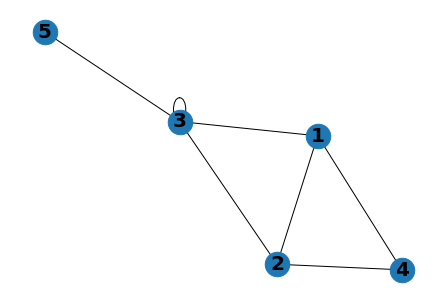

In [32]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [33]:
contient_cycle_profondeur(G, 1), contient_cycle_largeur(G, 1)

(True, True)

In [34]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

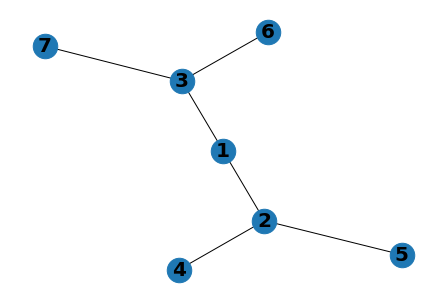

In [35]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [36]:
contient_cycle_profondeur(G, 1), contient_cycle_largeur(G, 1)

(False, False)

### Connexité

In [37]:
import collections

def connexite_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append(sommet_initial)
    while pile:
        sommet = pile.pop()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append(voisin)
    return False not in visites.values()

In [38]:
import collections

def connexite_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append(sommet_initial)
    while file:
        sommet = file.popleft()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append(voisin)
    return False not in visites.values()

In [39]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

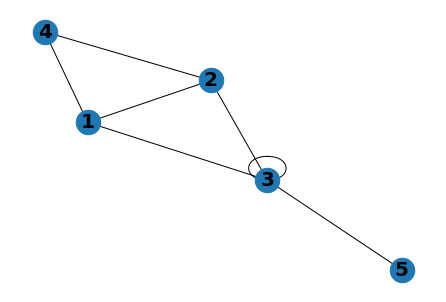

In [40]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [41]:
connexite_profondeur(G, 1), connexite_largeur(G, 1)

(True, True)

In [42]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3], 4: [1, 2], 5: [6, 7], 6 :[5], 7: [5]}

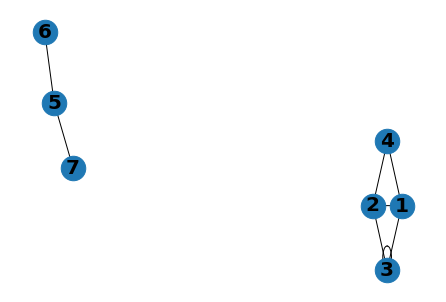

In [43]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [44]:
connexite_profondeur(G, 1), connexite_largeur(G, 1)

(False, False)

<!-- Faire la même chose pour les graphes orientés -->

<!-- Peut-être renvoyer la liste des visités pour parcours en largeur -->